In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.options.display.float_format='{:20.2f}'.format
pd.set_option('display.max_columns',999)

In [3]:
customerdf=pd.read_excel('online_retail_II.xlsx',sheet_name=1)

In [4]:
customerdf.shape

(541910, 8)

In [5]:
customerdf.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.00,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.00,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom


In [6]:
customerdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541910 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      541910 non-null  object        
 1   StockCode    541910 non-null  object        
 2   Description  540456 non-null  object        
 3   Quantity     541910 non-null  int64         
 4   InvoiceDate  541910 non-null  datetime64[ns]
 5   Price        541910 non-null  float64       
 6   Customer ID  406830 non-null  float64       
 7   Country      541910 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [7]:
customerdf.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,541910.00,541910,541910.00,406830.00
mean,9.55,2011-07-04 13:35:22.342307584,4.61,15287.68
min,-80995.00,2010-12-01 08:26:00,-11062.06,12346.00
25%,1.00,2011-03-28 11:34:00,1.25,13953.00
50%,3.00,2011-07-19 17:17:00,2.08,15152.00
75%,10.00,2011-10-19 11:27:00,4.13,16791.00
max,80995.00,2011-12-09 12:50:00,38970.00,18287.00
std,218.08,NaN,96.76,1713.60


## Inspecting quantity column

In [9]:
customerdf[customerdf['Quantity']<0]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.00,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.00,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.00,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.00,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.00,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.00,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.00,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.00,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.00,United Kingdom


## From what it is showing when ever the quantity is <0 the invoice starts with c means cancelled so will further check if all the invoices starts with c

In [11]:
customerdf['Invoice']=customerdf['Invoice'].astype("str")
customerdf[(customerdf['Quantity']<0) & (~customerdf['Invoice'].str.match('^C\\d{6}'))]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
2406,536589,21777,NaN,-10,2010-12-01 16:50:00,0.00,NaN,United Kingdom
4347,536764,84952C,NaN,-38,2010-12-02 14:42:00,0.00,NaN,United Kingdom
7188,536996,22712,NaN,-20,2010-12-03 15:30:00,0.00,NaN,United Kingdom
7189,536997,22028,NaN,-20,2010-12-03 15:30:00,0.00,NaN,United Kingdom
7190,536998,85067,NaN,-6,2010-12-03 15:30:00,0.00,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
535333,581210,23395,check,-26,2011-12-07 18:36:00,0.00,NaN,United Kingdom
535335,581212,22578,lost,-1050,2011-12-07 18:38:00,0.00,NaN,United Kingdom
535336,581213,22576,check,-30,2011-12-07 18:38:00,0.00,NaN,United Kingdom
536910,581226,23090,missing,-338,2011-12-08 09:56:00,0.00,NaN,United Kingdom


In [12]:
customerdf[(customerdf['Quantity']<0) & (~customerdf['Invoice'].str.match('^C\\d{6}') & (~customerdf['Customer ID'].isna()))]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country


## From above data we can see that Quantity <0 entry have either null customer or canceled invoice so by solving this quantity column will also get solved


In [14]:
customerdf.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,541910.00,541910,541910.00,406830.00
mean,9.55,2011-07-04 13:35:22.342307584,4.61,15287.68
min,-80995.00,2010-12-01 08:26:00,-11062.06,12346.00
25%,1.00,2011-03-28 11:34:00,1.25,13953.00
50%,3.00,2011-07-19 17:17:00,2.08,15152.00
75%,10.00,2011-10-19 11:27:00,4.13,16791.00
max,80995.00,2011-12-09 12:50:00,38970.00,18287.00
std,218.08,NaN,96.76,1713.60


## Inspecting price column

In [16]:
customerdf[customerdf['Price']<0]
##Removing null customer will also solve this

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom


In [17]:
customerdf.describe(include='O')

,Invoice,StockCode,Description,Country
count,541910,541910,540456,541910
unique,25900,4070,4223,38
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom
freq,1114,2313,2369,495478


## Data Cleaning

In [19]:
## No point in keeping rows without customer id
cleaneddf=customerdf.copy()

In [20]:
cleaneddf=cleaneddf[~cleaneddf['Customer ID'].isna()]

In [21]:
cleaneddf.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,406830.00,406830,406830.00,406830.00
mean,12.06,2011-07-10 16:31:30.127424512,3.46,15287.68
min,-80995.00,2010-12-01 08:26:00,0.00,12346.00
25%,2.00,2011-04-06 15:02:00,1.25,13953.00
50%,5.00,2011-07-31 11:48:00,1.95,15152.00
75%,12.00,2011-10-20 13:06:00,3.75,16791.00
max,80995.00,2011-12-09 12:50:00,38970.00,18287.00
std,248.69,NaN,69.32,1713.60


In [22]:
cleaneddf.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.00,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.00,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom


In [23]:
##Cleaning cancelled Invoice
cleaneddf[~cleaneddf['Invoice'].str.match('^\\d{6}$')]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.00,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.00,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.00,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.00,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.00,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.00,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.00,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.00,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.00,United Kingdom


In [24]:
##Finding if there are any Invoice that donot contain oly 6 digits and dont start with c
cleaneddf[(~cleaneddf['Invoice'].str.match('^\\d{6}$')) & (~cleaneddf['Invoice'].str.match('^C\\d{6}$'))]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country


In [25]:
## just remove cancelled invoice
mask=(
    cleaneddf['Invoice'].str.match('^\\d{6}$')
)
cleaneddf=cleaneddf[mask]

In [26]:
#3cHECKING IF THAT INOIVES ARE REMOVED
cleaneddf[cleaneddf['Invoice'].str.match('^C\\d{6}$')]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country


In [27]:
##neg column problem solved
cleaneddf.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,397925.00,397925,397925.00,397925.00
mean,13.02,2011-07-10 23:44:09.817126400,3.12,15294.31
min,1.00,2010-12-01 08:26:00,0.00,12346.00
25%,2.00,2011-04-07 11:12:00,1.25,13969.00
50%,6.00,2011-07-31 14:39:00,1.95,15159.00
75%,12.00,2011-10-20 14:33:00,3.75,16795.00
max,80995.00,2011-12-09 12:50:00,8142.75,18287.00
std,180.42,NaN,22.10,1713.17


In [28]:
##Inspecting Stockcode should be 5 digits 
cleaneddf['StockCode']=cleaneddf['StockCode'].astype("str")
cleaneddf[cleaneddf['StockCode'].str.match('^\\d{5}$')]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.00,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.00,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.00,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.00,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.00,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.00,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.00,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.00,France


In [29]:
##filtering out stockcode that donot contain 5 digits
cleaneddf[~cleaneddf['StockCode'].str.match('^\\d{5}$')]['StockCode'].value_counts()

StockCode
85123A    2035
85099B    1618
POST      1100
82494L     820
85099F     664
          ... 
84809B       1
90024C       1
90024F       1
90152C       1
90214Z       1
Name: count, Length: 880, dtype: int64

In [30]:
##filtering out stockcode that donot contain 5 digit
cleaneddf[~cleaneddf['StockCode'].str.match('^\\d{5}$')]['StockCode'].value_counts().head(20)

StockCode
85123A    2035
85099B    1618
POST      1100
82494L     820
85099F     664
85099C     659
84997D     429
84970S     415
47591D     401
15056N     382
84596B     379
47590B     363
47590A     356
85049E     347
84970L     338
84997B     330
84029E     328
84029G     326
47566B     317
84997C     309
Name: count, dtype: int64

In [31]:
##Inspecting if these stock code are legit
cleaneddf[cleaneddf['StockCode']=='85123A'].sample(10)
##This stock code seems logical to me 

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
79808,543006,85123A,WHITE HANGING HEART T-LIGHT HOLDER,4,2011-02-02 12:53:00,2.95,17975.00,United Kingdom
231238,557255,85123A,WHITE HANGING HEART T-LIGHT HOLDER,64,2011-06-19 10:11:00,2.55,17616.00,United Kingdom
212216,555418,85123A,WHITE HANGING HEART T-LIGHT HOLDER,12,2011-06-03 10:19:00,2.95,15498.00,United Kingdom
155517,549995,85123A,WHITE HANGING HEART T-LIGHT HOLDER,32,2011-04-14 08:32:00,2.55,16131.00,United Kingdom
276423,561044,85123A,WHITE HANGING HEART T-LIGHT HOLDER,64,2011-07-24 12:26:00,2.55,13831.00,United Kingdom
119683,546562,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2011-03-15 10:45:00,2.95,16293.00,United Kingdom
267115,560285,85123A,WHITE HANGING HEART T-LIGHT HOLDER,24,2011-07-18 09:21:00,2.95,14944.00,United Kingdom
83098,543282,85123A,WHITE HANGING HEART T-LIGHT HOLDER,1,2011-02-06 16:08:00,2.95,12956.00,United Kingdom
102899,545043,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2,2011-02-27 11:05:00,2.95,16407.00,United Kingdom
186593,552872,85123A,WHITE HANGING HEART T-LIGHT HOLDER,32,2011-05-12 09:09:00,2.55,16985.00,United Kingdom


In [32]:
cleaneddf[cleaneddf['StockCode']=='85099B'].sample(10)
##This also seems logical

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
7845,537057,85099B,JUMBO BAG RED RETROSPOT,4,2010-12-05 11:49:00,1.95,15351.00,United Kingdom
133454,547787,85099B,JUMBO BAG RED RETROSPOT,60,2011-03-25 11:57:00,1.95,13139.00,United Kingdom
376238,569520,85099B,JUMBO BAG RED RETROSPOT,10,2011-10-04 14:32:00,2.08,17667.00,United Kingdom
356945,568061,85099B,JUMBO BAG RED RETROSPOT,1,2011-09-23 13:12:00,2.08,16910.00,United Kingdom
380831,569839,85099B,JUMBO BAG RED RETROSPOT,100,2011-10-06 13:21:00,1.79,15769.00,United Kingdom
375257,569424,85099B,JUMBO BAG RED RETROSPOT,4,2011-10-04 10:49:00,2.08,15529.00,United Kingdom
216956,555861,85099B,JUMBO BAG RED RETROSPOT,20,2011-06-07 14:27:00,2.08,12990.00,United Kingdom
108330,545530,85099B,JUMBO BAG RED RETROSPOT,10,2011-03-03 13:45:00,1.95,17416.00,United Kingdom
398324,571235,85099B,JUMBO BAG RED RETROSPOT,20,2011-10-14 14:37:00,2.08,15078.00,United Kingdom
424502,573269,85099B,JUMBO BAG RED RETROSPOT,1,2011-10-28 13:00:00,2.08,16764.00,United Kingdom


In [33]:
cleaneddf[cleaneddf['StockCode']=='POST'].sample(10).shape
##this seems to be notuseful feels like shipping charges 

(10, 8)

In [34]:
cleaneddf[cleaneddf['StockCode']=='82494L'].sample(10)
## this seems logical so we will keep it

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
535159,581191,82494L,WOODEN FRAME ANTIQUE WHITE,4,2011-12-07 16:56:00,2.95,17449.00,United Kingdom
529910,580757,82494L,WOODEN FRAME ANTIQUE WHITE,6,2011-12-06 10:27:00,2.95,13709.00,United Kingdom
73047,542277,82494L,WOODEN FRAME ANTIQUE WHITE,12,2011-01-27 10:30:00,2.95,14440.00,United Kingdom
117578,546392,82494L,WOODEN FRAME ANTIQUE WHITE,4,2011-03-11 14:15:00,2.95,14587.00,United Kingdom
307086,563905,82494L,WOODEN FRAME ANTIQUE WHITE,6,2011-08-21 11:43:00,2.95,13267.00,United Kingdom
407226,571850,82494L,WOODEN FRAME ANTIQUE WHITE,1,2011-10-19 12:54:00,2.95,14698.00,United Kingdom
524465,580559,82494L,WOODEN FRAME ANTIQUE WHITE,12,2011-12-05 10:24:00,2.95,15628.00,United Kingdom
147337,549104,82494L,WOODEN FRAME ANTIQUE WHITE,30,2011-04-06 11:43:00,2.55,15311.00,United Kingdom
372981,569254,82494L,WOODEN FRAME ANTIQUE WHITE,1,2011-10-03 11:00:00,2.95,18116.00,United Kingdom
37529,539469,82494L,WOODEN FRAME ANTIQUE WHITE,2,2010-12-19 13:59:00,2.95,17841.00,United Kingdom


In [35]:
cleaneddf[cleaneddf['StockCode']=='85099F'].sample(10)
##also keep it 

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
107673,545461,85099F,JUMBO BAG STRAWBERRY,10,2011-03-03 08:24:00,1.95,14388.00,United Kingdom
476403,577016,85099F,JUMBO BAG STRAWBERRY,10,2011-11-17 12:21:00,2.08,17095.00,United Kingdom
131889,547650,85099F,JUMBO BAG STRAWBERRY,1,2011-03-24 12:08:00,1.95,17059.00,United Kingdom
139587,548327,85099F,JUMBO BAG STRAWBERRY,2,2011-03-30 13:05:00,2.08,16788.00,United Kingdom
314106,564562,85099F,JUMBO BAG STRAWBERRY,10,2011-08-26 09:58:00,2.08,15203.00,United Kingdom
309100,564061,85099F,JUMBO BAG STRAWBERRY,4,2011-08-22 14:38:00,2.08,14505.00,United Kingdom
218171,556021,85099F,JUMBO BAG STRAWBERRY,10,2011-06-08 12:03:00,2.08,12921.00,United Kingdom
91675,544112,85099F,JUMBO BAG STRAWBERRY,10,2011-02-16 11:37:00,1.95,15039.00,United Kingdom
371331,569218,85099F,JUMBO BAG STRAWBERRY,2,2011-10-02 12:47:00,2.08,15952.00,United Kingdom
389607,570482,85099F,JUMBO BAG STRAWBERRY,1,2011-10-10 17:00:00,2.08,17459.00,United Kingdom


In [36]:

cleaneddf[cleaneddf['StockCode']=='85099C'].sample(10)
##logical

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
222301,556415,85099C,JUMBO BAG BAROQUE BLACK WHITE,100,2011-06-10 12:19:00,1.79,12409.00,Switzerland
331308,566008,85099C,JUMBO BAG BAROQUE BLACK WHITE,2,2011-09-08 12:04:00,2.08,16426.00,United Kingdom
218321,556041,85099C,JUMBO BAG BAROQUE BLACK WHITE,2,2011-06-08 12:44:00,2.08,17954.00,United Kingdom
259047,559684,85099C,JUMBO BAG BAROQUE BLACK WHITE,10,2011-07-11 15:05:00,2.08,14367.00,United Kingdom
502828,578852,85099C,JUMBO BAG BAROQUE BLACK WHITE,2,2011-11-27 11:12:00,2.08,17841.00,United Kingdom
501129,578819,85099C,JUMBO BAG BAROQUE BLACK WHITE,100,2011-11-25 13:52:00,1.79,15311.00,United Kingdom
488965,577859,85099C,JUMBO BAG BAROQUE BLACK WHITE,10,2011-11-22 11:24:00,2.08,14534.00,United Kingdom
109531,545649,85099C,JUMBO BAG BAROQUE BLACK WHITE,1,2011-03-04 13:14:00,1.95,14995.00,United Kingdom
310509,564187,85099C,JUMBO BAG BAROQUE BLACK WHITE,2,2011-08-23 15:24:00,2.08,15005.00,United Kingdom
303427,563543,85099C,JUMBO BAG BAROQUE BLACK WHITE,10,2011-08-17 12:06:00,2.08,15039.00,United Kingdom


## We will keep all stock code except Post 

In [38]:
cleaneddf=cleaneddf[cleaneddf['StockCode'] !='POST']

In [39]:
cleaneddf.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.00,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.00,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom


## Feature engeenering some columns

In [41]:
cleaneddf['Total_amount']=cleaneddf['Price']*cleaneddf['Quantity']

In [42]:
cleaneddf['Purchaseday']=cleaneddf['InvoiceDate'].dt.day_name()

In [43]:
cleaneddf['PurchaseHour']=cleaneddf['InvoiceDate'].dt.hour

In [44]:
cleaneddf.sample(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Total_amount,Purchaseday,PurchaseHour
423526,573150,22197,POPCORN HOLDER,5,2011-10-27 20:07:00,0.85,15014.00,United Kingdom,4.25,Thursday,20
508094,579196,22115,METAL SIGN EMPIRE TEA,2,2011-11-28 15:54:00,5.79,14096.00,United Kingdom,11.58,Monday,15
90969,544074,21465,PINK FLOWER CROCHET FOOD COVER,2,2011-02-15 14:49:00,3.75,14156.00,EIRE,7.50,Tuesday,14
159902,550408,21929,JUMBO BAG PINK VINTAGE PAISLEY,10,2011-04-18 11:59:00,2.08,16746.00,United Kingdom,20.80,Monday,11
196838,553867,22902,TOTE BAG I LOVE LONDON,50,2011-05-19 14:19:00,1.69,17306.00,United Kingdom,84.50,Thursday,14
364148,568650,21251,DINOSAUR HEIGHT CHART STICKER SET,6,2011-09-28 11:56:00,2.95,13505.00,Switzerland,17.70,Wednesday,11
116336,546237,22720,SET OF 3 CAKE TINS PANTRY DESIGN,3,2011-03-10 12:50:00,4.95,16625.00,United Kingdom,14.85,Thursday,12
356800,568060,23437,50'S CHRISTMAS GIFT BAG LARGE,4,2011-09-23 13:11:00,1.25,14546.00,United Kingdom,5.00,Friday,13
43589,540098,21175,GIN + TONIC DIET METAL SIGN,1,2011-01-04 15:50:00,2.10,16241.00,United Kingdom,2.10,Tuesday,15
205306,554788,23110,PARISIENNE KEY CABINET,2,2011-05-26 12:00:00,5.75,12987.00,United Kingdom,11.50,Thursday,12


## Data Visualisation

In [46]:
InvoiceSummary=cleaneddf.groupby(by='Invoice',as_index=False).agg({
    'InvoiceDate':'first',
    'Customer ID': 'first',
    'Country': 'first',
    'Total_amount': 'sum',
    'Quantity': 'sum',
    'PurchaseHour': 'first',
    'Purchaseday': 'first'
    
})

In [47]:
InvoiceSummary.head()

,Invoice,InvoiceDate,Customer ID,Country,Total_amount,Quantity,PurchaseHour,Purchaseday
0,536365,2010-12-01 08:26:00,17850.00,United Kingdom,139.12,40,8,Wednesday
1,536366,2010-12-01 08:28:00,17850.00,United Kingdom,22.20,12,8,Wednesday
2,536367,2010-12-01 08:34:00,13047.00,United Kingdom,278.73,83,8,Wednesday
3,536368,2010-12-01 08:34:00,13047.00,United Kingdom,70.05,15,8,Wednesday
4,536369,2010-12-01 08:35:00,13047.00,United Kingdom,17.85,3,8,Wednesday


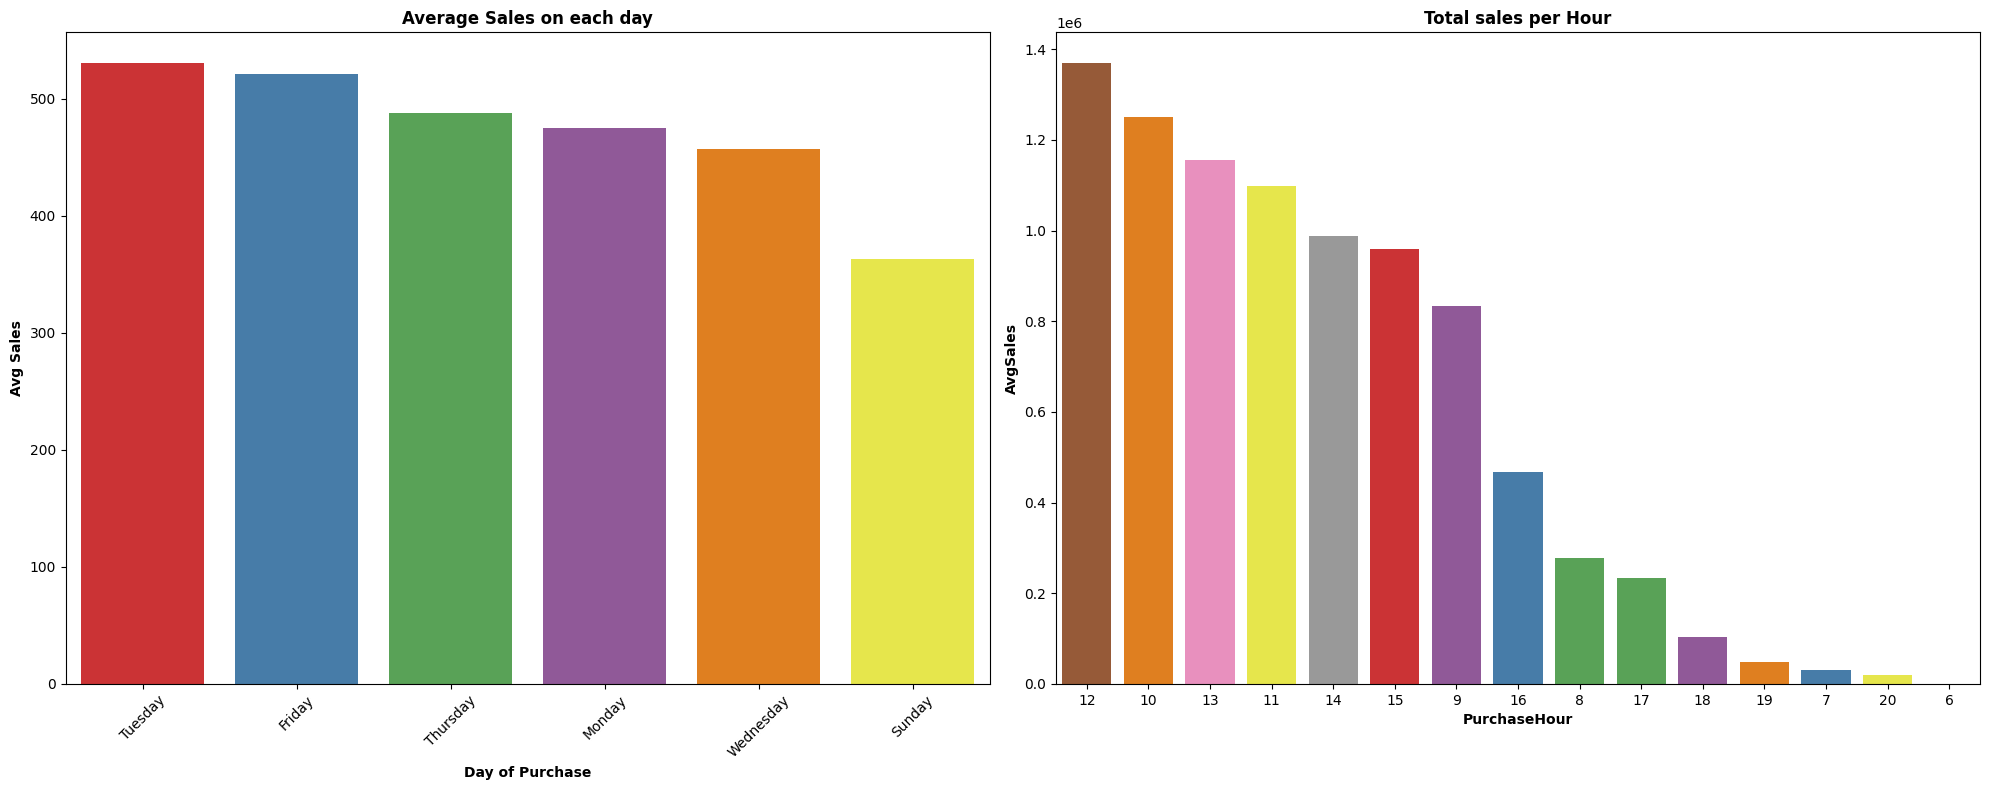

In [48]:
avg_sales_by_day = InvoiceSummary.groupby('Purchaseday')['Total_amount'].mean().reset_index()
avg_sales_by_day=avg_sales_by_day.sort_values(by='Total_amount',ascending=False)
avg_sales_per_hour=InvoiceSummary.groupby('PurchaseHour')['Total_amount'].sum().reset_index()
avg_sales_per_hour=avg_sales_per_hour.sort_values(by='Total_amount',ascending=False)
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
sns.barplot(data=avg_sales_by_day,x='Purchaseday',y='Total_amount',hue='Purchaseday',palette='Set1',legend=False,order=avg_sales_by_day['Purchaseday'])
plt.xlabel('Day of Purchase',fontweight='bold')
plt.ylabel('Avg Sales',fontweight='bold')
plt.title('Average Sales on each day',fontweight='bold')
plt.xticks(rotation=45)

plt.subplot(1,2,2)
sns.barplot(data=avg_sales_per_hour,x='PurchaseHour',y='Total_amount',hue='PurchaseHour',legend=False,palette='Set1',order=avg_sales_per_hour['PurchaseHour'])
plt.xlabel('PurchaseHour',fontweight='bold')
plt.ylabel('AvgSales',fontweight='bold')
plt.title('Total sales per Hour',fontweight='bold')
plt.tight_layout()

plt.show()

In [49]:
customergroup=cleaneddf.groupby(by='Customer ID',as_index=False).agg(
    Country=('Country','first'),
    Total_Purchase=('Total_amount','sum'),
    Frequency=('Invoice','nunique'),
    lastpurchase=('InvoiceDate','max'),
    TotalQuantity=('Quantity','sum')
)

In [50]:
customergroup.head()

,Customer ID,Country,Total_Purchase,Frequency,lastpurchase,TotalQuantity
0,12346.00,United Kingdom,77183.60,1,2011-01-18 10:01:00,74215
1,12347.00,Iceland,4310.00,7,2011-12-07 15:52:00,2458
2,12348.00,Finland,1437.24,4,2011-09-25 13:13:00,2332
3,12349.00,Italy,1457.55,1,2011-11-21 09:51:00,630
4,12350.00,Norway,294.40,1,2011-02-02 16:01:00,196


In [51]:
## TOP COUNTRIES WITH MOST CUSTOMERS

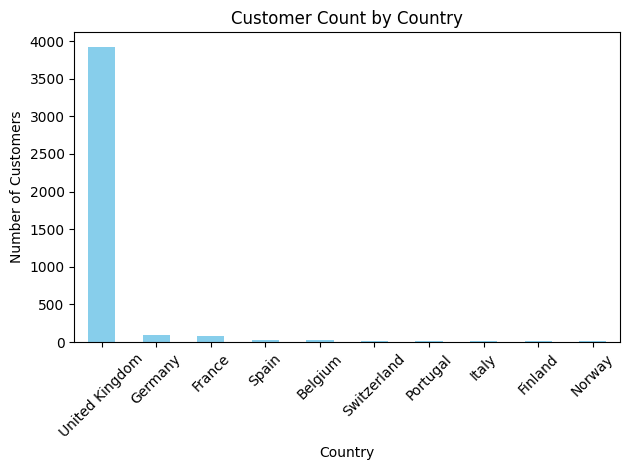

In [52]:
top_countries = customergroup.groupby('Country')['Customer ID'].nunique().sort_values(ascending=False).head(10)
top_countries.plot(kind='bar', color='skyblue')
plt.title('Customer Count by Country')
plt.xlabel('Country')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


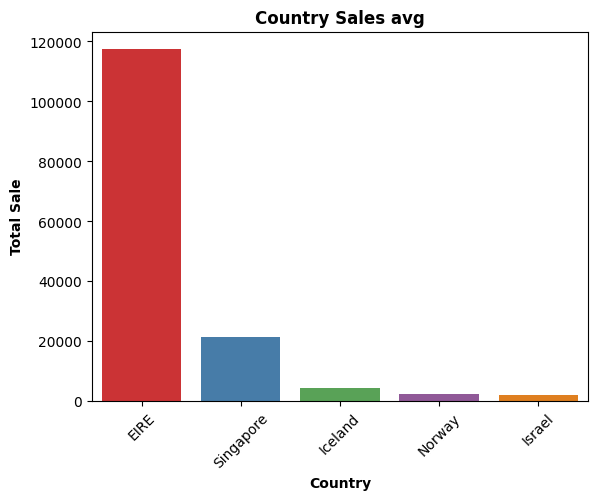

In [53]:
avgsalepercountry=customergroup.groupby(by='Country')['Total_Purchase'].median().reset_index()
avgsalepercountry=avgsalepercountry.sort_values(by='Total_Purchase',ascending=False).head(5)
sns.barplot(data=avgsalepercountry,x='Country',y='Total_Purchase',hue='Country',palette='Set1',legend=False, order=avgsalepercountry['Country'].tolist())
plt.xlabel('Country',fontweight='bold')
plt.ylabel('Total Sale',fontweight='bold')
plt.title('Country Sales avg',fontweight='bold')
plt.xticks(rotation=45)
plt.show()

In [54]:
customergroup.head()

,Customer ID,Country,Total_Purchase,Frequency,lastpurchase,TotalQuantity
0,12346.00,United Kingdom,77183.60,1,2011-01-18 10:01:00,74215
1,12347.00,Iceland,4310.00,7,2011-12-07 15:52:00,2458
2,12348.00,Finland,1437.24,4,2011-09-25 13:13:00,2332
3,12349.00,Italy,1457.55,1,2011-11-21 09:51:00,630
4,12350.00,Norway,294.40,1,2011-02-02 16:01:00,196


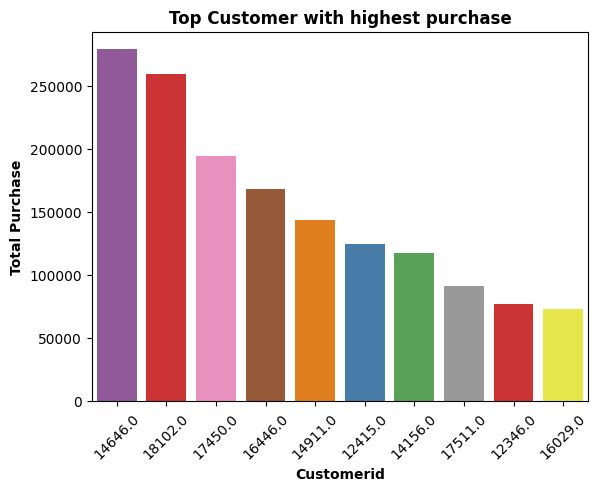

In [55]:
top20customer=customergroup.sort_values(by='Total_Purchase',ascending=False).head(10)
sns.barplot(data=top20customer,x='Customer ID',y='Total_Purchase',hue='Customer ID',palette='Set1',legend=False, order=top20customer['Customer ID'].tolist())
plt.xlabel('Customerid',fontweight='bold')
plt.ylabel('Total Purchase',fontweight='bold')
plt.title('Top Customer with highest purchase',fontweight='bold')
plt.xticks(rotation=45)
plt.show()

In [56]:
Maxinvoice=customergroup['lastpurchase'].max()
customergroup['Recency']=(Maxinvoice-customergroup['lastpurchase']).dt.days

In [57]:
customergroup.head()


,Customer ID,Country,Total_Purchase,Frequency,lastpurchase,TotalQuantity,Recency
0,12346.00,United Kingdom,77183.60,1,2011-01-18 10:01:00,74215,325
1,12347.00,Iceland,4310.00,7,2011-12-07 15:52:00,2458,1
2,12348.00,Finland,1437.24,4,2011-09-25 13:13:00,2332,74
3,12349.00,Italy,1457.55,1,2011-11-21 09:51:00,630,18
4,12350.00,Norway,294.40,1,2011-02-02 16:01:00,196,309


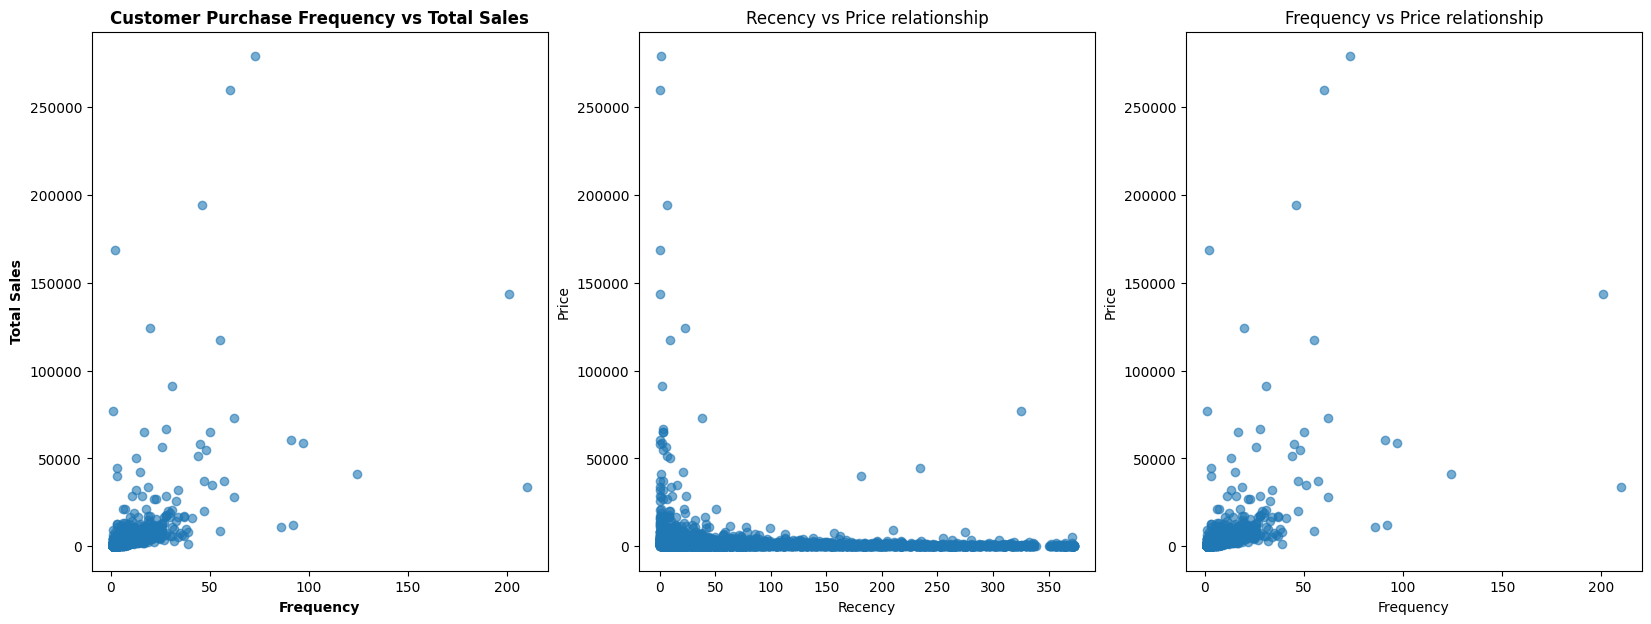

In [58]:
plt.figure(figsize=(20,7))
plt.subplot(1,3,1)

plt.scatter(data=customergroup, x='Frequency', y='Total_Purchase', marker='o', alpha=0.6)
plt.xlabel('Frequency', fontweight='bold')
plt.ylabel('Total Sales', fontweight='bold')
plt.title('Customer Purchase Frequency vs Total Sales', fontweight='bold')

plt.subplot(1,3,2)
plt.scatter(data=customergroup,x='Recency',y='Total_Purchase',marker='o',alpha=0.6)
plt.xlabel('Recency')
plt.ylabel('Price')
plt.title('Recency vs Price relationship')

plt.subplot(1,3,3)
plt.scatter(data=customergroup,x='Frequency',y='Total_Purchase',marker='o',alpha=0.6)
plt.xlabel('Frequency')
plt.ylabel('Price')
plt.title('Frequency vs Price relationship')

plt.show()


## Applying k means clustering to group similar customer togeather 

In [60]:
customerrfm=customergroup[['Customer ID','Frequency','Total_Purchase','Recency']]

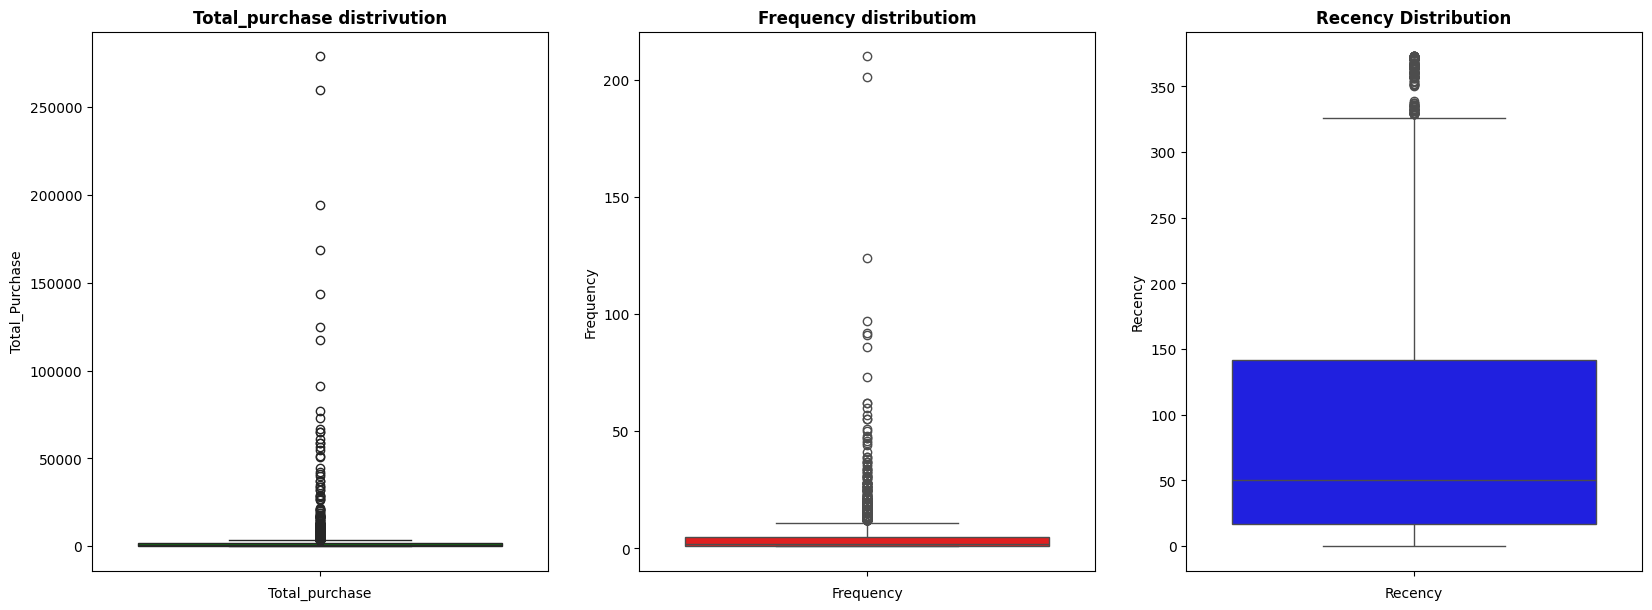

In [61]:
##First checking for outlier
plt.figure(figsize=(20,7))
plt.subplot(1,3,1)
sns.boxplot(customerrfm['Total_Purchase'],color='Green')
plt.xlabel('Total_purchase')

plt.title('Total_purchase distrivution', fontweight='bold')

plt.subplot(1,3,2)
sns.boxplot(customerrfm['Frequency'],color='red')
plt.xlabel('Frequency')

plt.title('Frequency distributiom',fontweight='bold')

plt.subplot(1,3,3)
sns.boxplot(customerrfm['Recency'],color='blue')
plt.xlabel('Recency')
plt.title('Recency Distribution',fontweight='bold')

plt.show()


## AS there are many outliers and they are important as they represent the customer with highest purchase so we will seprate them

In [63]:
purchaseq1=customerrfm['Total_Purchase'].quantile(0.25)
purchaseq3=customerrfm['Total_Purchase'].quantile(0.75)
purchaseiqr=purchaseq3-purchaseq1
purchaseupperbound=purchaseq3+1.5*purchaseiqr
purchase_outlier=customerrfm[customerrfm['Total_Purchase']>purchaseupperbound]

frequencyq1=customerrfm['Frequency'].quantile(0.25)
frequencyq3=customerrfm['Frequency'].quantile(0.75)
frequencyiqr=frequencyq3-frequencyq1
frequencyupperbound=frequencyq3+1.5*frequencyiqr
frequency_outlier=customerrfm[customerrfm['Frequency']>frequencyupperbound]
sameindeces=frequency_outlier.index.union(purchase_outlier.index)
outlierdf=customerrfm.loc[sameindeces]
nonoutlierdf=customerrfm.drop(sameindeces)




In [64]:
outlierdf.shape

(467, 4)

In [65]:
nonoutlierdf

,Customer ID,Frequency,Total_Purchase,Recency
2,12348.00,4,1437.24,74
3,12349.00,1,1457.55,18
4,12350.00,1,294.40,309
5,12352.00,8,2226.04,35
6,12353.00,1,89.00,203
...,...,...,...,...
4333,18278.00,1,173.90,73
4334,18280.00,1,180.60,277
4335,18281.00,1,80.82,180
4336,18282.00,2,178.05,7


## Now applying Kmeans on non outler df


In [67]:
## step1)Scaling
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

scalar=StandardScaler()
scaleddata=scalar.fit_transform(nonoutlierdf[['Total_Purchase','Frequency','Recency']])
scaleddata

array([[ 0.71814313,  0.56543822, -0.25261893],
       [ 0.74340844, -0.8109512 , -0.80319656],
       [-0.70353111, -0.8109512 ,  2.05784077],
       ...,
       [-0.96922113, -0.8109512 ,  0.78954587],
       [-0.8482686 , -0.35215473, -0.91134574],
       [ 1.21578634,  0.10664174, -0.56723472]])

In [68]:
scaled_data_df=pd.DataFrame(scaleddata,index=nonoutlierdf.index,columns=('Total_Purchase','Frequency','Recency'))
scaled_data_df

,Total_Purchase,Frequency,Recency
2,0.72,0.57,-0.25
3,0.74,-0.81,-0.80
4,-0.70,-0.81,2.06
5,1.70,2.40,-0.64
6,-0.96,-0.81,1.02
...,...,...,...
4333,-0.85,-0.81,-0.26
4334,-0.85,-0.81,1.74
4335,-0.97,-0.81,0.79
4336,-0.85,-0.35,-0.91


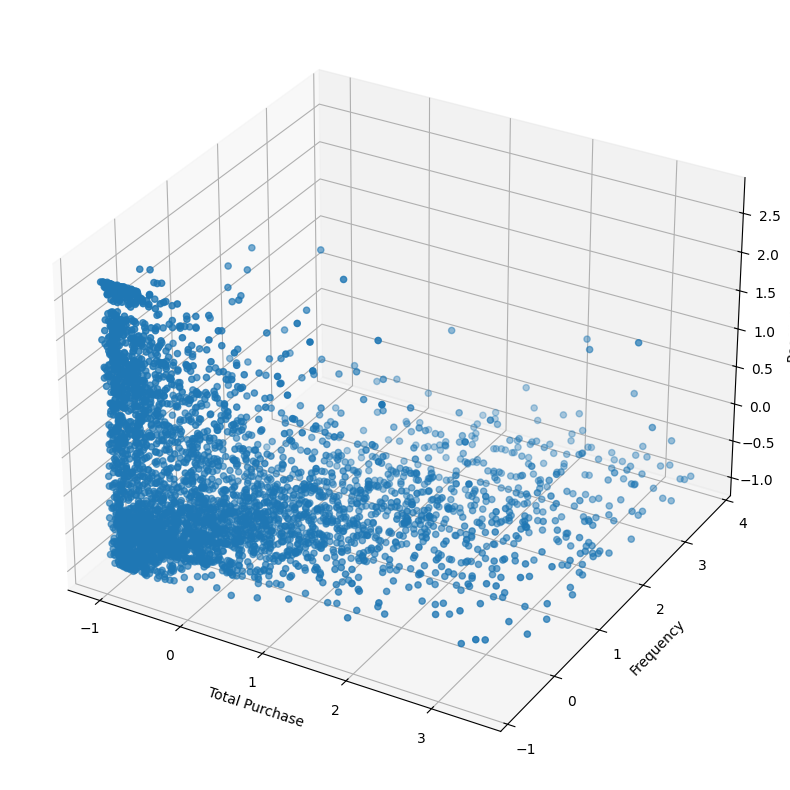

In [69]:
fig=plt.figure(figsize=(10,10))
ax=fig.add_subplot(projection='3d')
scatter=ax.scatter(scaled_data_df['Total_Purchase'],scaled_data_df['Frequency'],scaled_data_df['Recency'])
ax.set_xlabel('Total Purchase')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')
plt.show()

In [70]:
k=range(2,12)
inertia=[]
sil_score=[]
for i in k:
    kmean=KMeans(n_clusters=i,max_iter=1000,random_state=42)
    kmean.fit(scaled_data_df)
    sil=silhouette_score(scaled_data_df,kmean.labels_)
    sil_score.append(sil)
    inertia.append(kmean.inertia_)
    

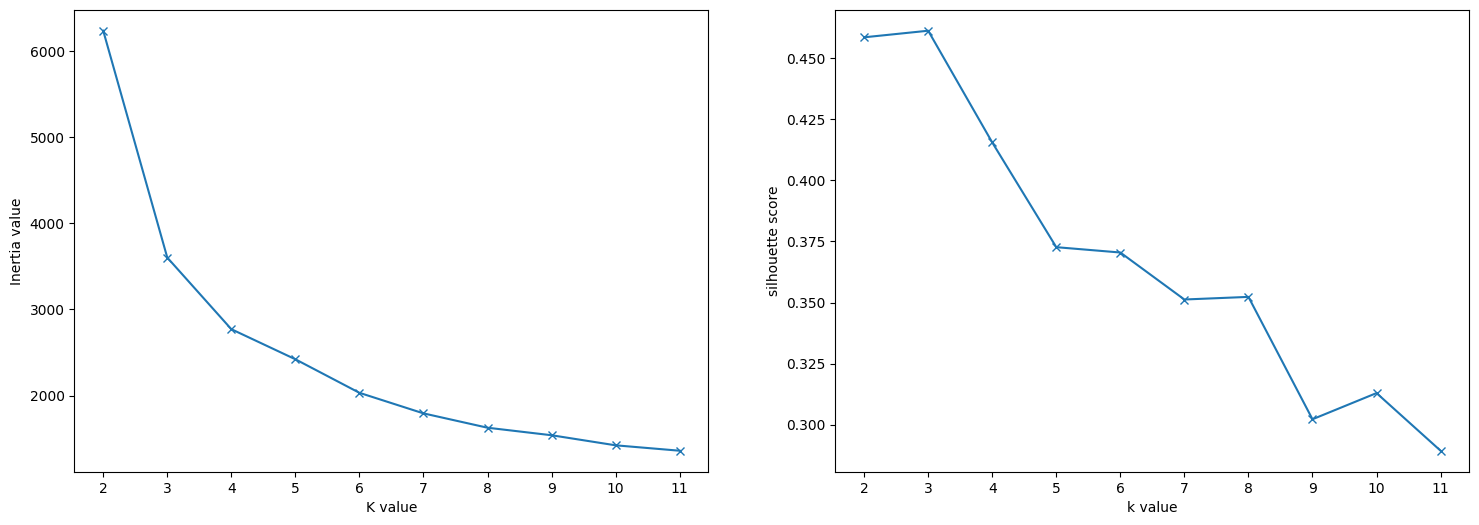

In [71]:
plt.figure(figsize=(18,6))
plt.subplot(1,2,1)
plt.plot(k,inertia,marker='x')
plt.xlabel('K value')
plt.ylabel('Inertia value')
plt.xticks(k)

plt.subplot(1,2,2)
plt.plot(k,sil_score,marker='x')
plt.xlabel('k value')
plt.ylabel('silhouette score')
plt.xticks(k)
plt.show()

## Using ebow method we will go with k=4

In [73]:
kmean=KMeans(n_clusters=4,max_iter=1000,random_state=42)
labels=kmean.fit_predict(scaled_data_df)
nonoutlierdf['CustomerCategory']=labels

In [74]:
nonoutlierdf

,Customer ID,Frequency,Total_Purchase,Recency,CustomerCategory
2,12348.00,4,1437.24,74,0
3,12349.00,1,1457.55,18,3
4,12350.00,1,294.40,309,2
5,12352.00,8,2226.04,35,1
6,12353.00,1,89.00,203,2
...,...,...,...,...,...
4333,18278.00,1,173.90,73,3
4334,18280.00,1,180.60,277,2
4335,18281.00,1,80.82,180,2
4336,18282.00,2,178.05,7,3


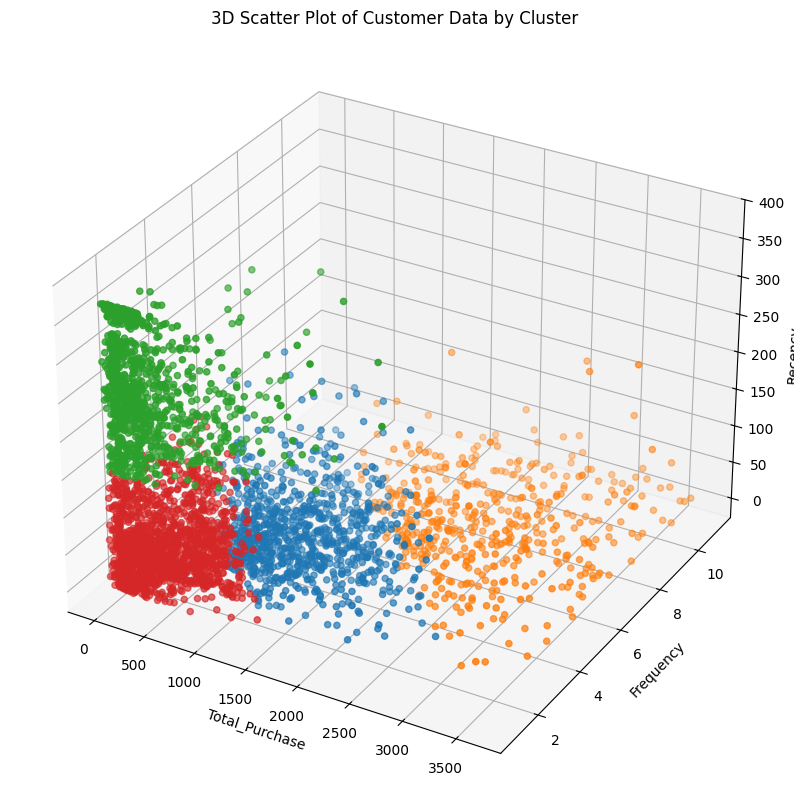

In [75]:
cluster_colors = {
    0: '#1f77b4',  # Blue
    1: '#ff7f0e',  # Orange
    2: '#2ca02c',  # Green
    3: '#d62728'   # Red
}


colors = nonoutlierdf['CustomerCategory'].map(cluster_colors)


fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')


scatter = ax.scatter(
    nonoutlierdf['Total_Purchase'],
    nonoutlierdf['Frequency'],
    nonoutlierdf['Recency'],
    c=colors,
    marker='o'
)


ax.set_xlabel('Total_Purchase')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')


ax.set_title('3D Scatter Plot of Customer Data by Cluster')


plt.show()

## Visualising Clusters

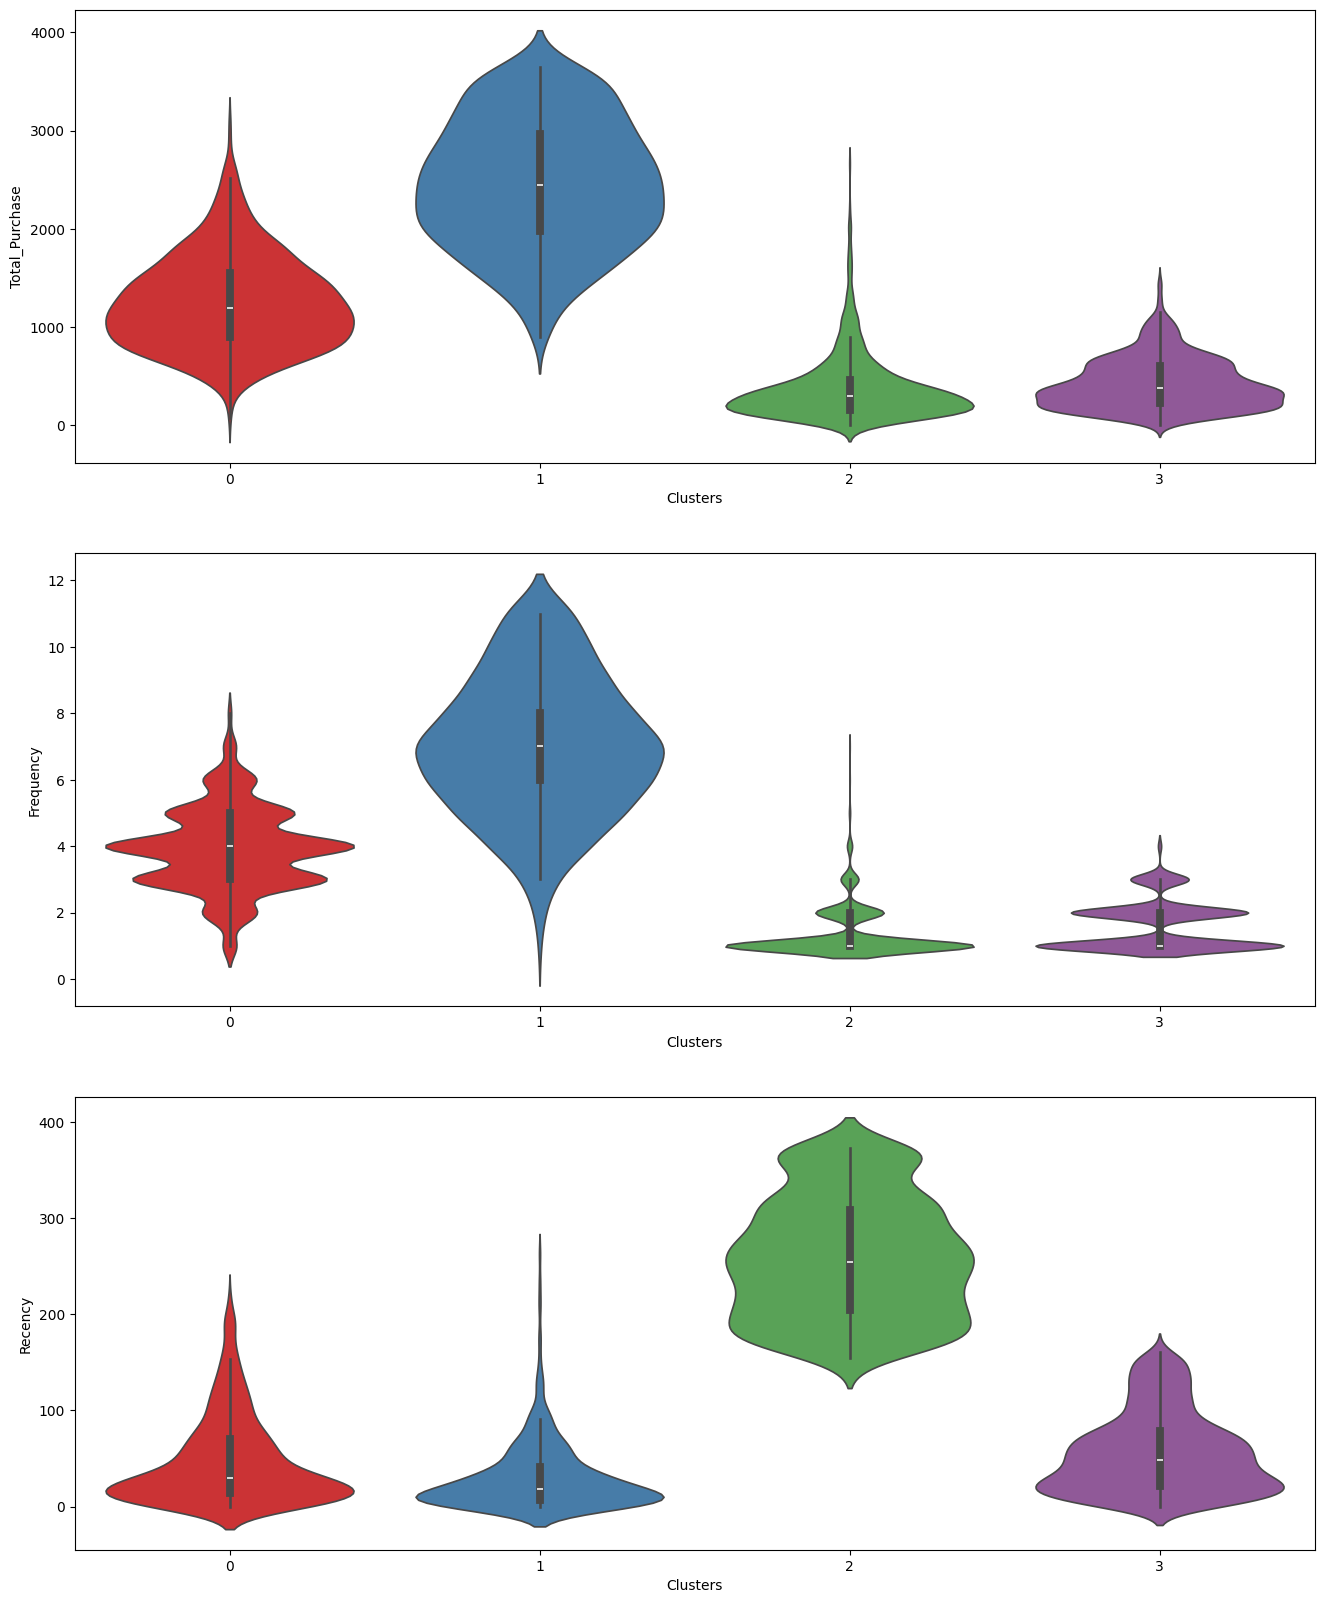

In [77]:
plt.figure(figsize=(16,20))
plt.subplot(3,1,1)
sns.violinplot(data=nonoutlierdf,x='CustomerCategory',y='Total_Purchase',hue='CustomerCategory',legend=False,palette='Set1')
plt.xlabel('Clusters')
plt.ylabel('Total_Purchase')

plt.subplot(3,1,2)
sns.violinplot(data=nonoutlierdf,x='CustomerCategory',y='Frequency',hue='CustomerCategory',legend=False,palette='Set1')
plt.xlabel('Clusters')
plt.ylabel('Frequency')

plt.subplot(3,1,3)
sns.violinplot(data=nonoutlierdf,x='CustomerCategory',y='Recency',hue='CustomerCategory',legend=False,palette='Set1')
plt.xlabel('Clusters')
plt.ylabel('Recency')

plt.show()


## Conclusion

## Now dealing with outlier which me removed (VVIP CUSTOMER)

In [80]:
outlierdf['CustomerCategory']='Vvip Customers'
outlierdf.head()

,Customer ID,Frequency,Total_Purchase,Recency,CustomerCategory
0,12346.00,1,77183.60,325,Vvip Customers
1,12347.00,7,4310.00,1,Vvip Customers
10,12357.00,1,6207.67,32,Vvip Customers
12,12359.00,4,6372.58,57,Vvip Customers
15,12362.00,10,4737.23,2,Vvip Customers


In [81]:
Finalcustomerdf=pd.concat([outlierdf,nonoutlierdf],axis=0)
Finalcustomerdf.head()

,Customer ID,Frequency,Total_Purchase,Recency,CustomerCategory
0,12346.00,1,77183.60,325,Vvip Customers
1,12347.00,7,4310.00,1,Vvip Customers
10,12357.00,1,6207.67,32,Vvip Customers
12,12359.00,4,6372.58,57,Vvip Customers
15,12362.00,10,4737.23,2,Vvip Customers


## Giving names to clusters

In [83]:
Finalcustomerdf['CustomerCategory'] = Finalcustomerdf['CustomerCategory'].apply(
    lambda x: 'valuable Customers' if x == 1 
              else 'loyal Customers' if x == 0 
              else 'Lost Customers' if x == 2 
              else 'New/at risk Customer' if x == 3
              else 'Vip Customers'
            
)


## Some More visualisation

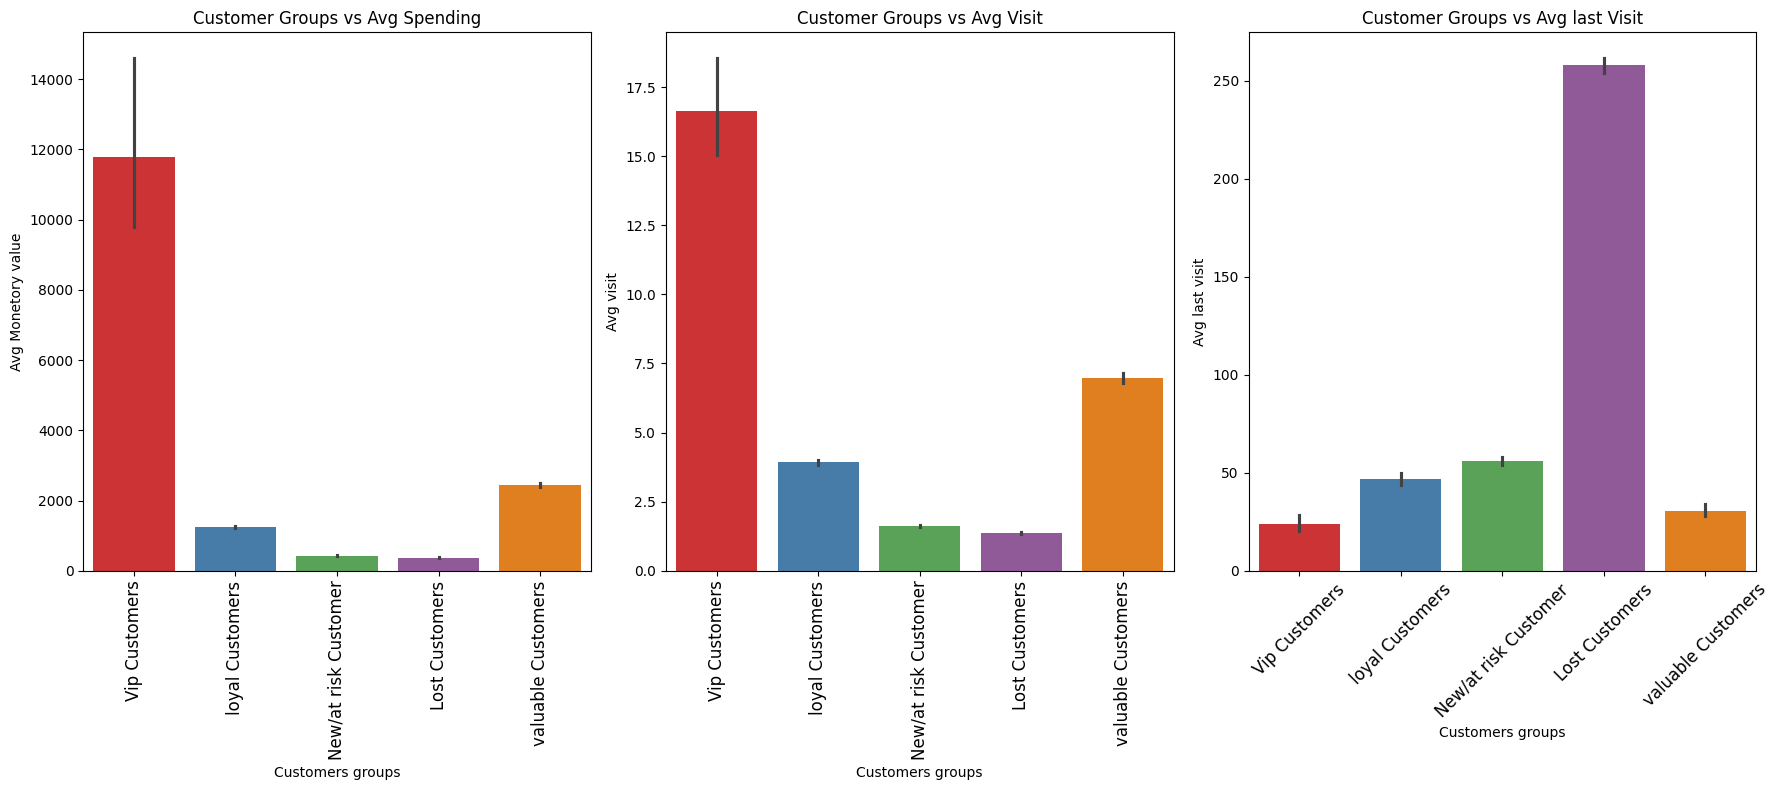

In [85]:
plt.figure(figsize=(18,8))

plt.subplot(1,3,1)
sns.barplot(data=Finalcustomerdf,x='CustomerCategory',y='Total_Purchase',hue='CustomerCategory',palette='Set1',legend=False)
plt.title('Customer Groups vs Avg Spending')
plt.xlabel('Customers groups')
plt.ylabel('Avg Monetory value')
plt.xticks(rotation='vertical',fontsize=12,color='black')

plt.subplot(1,3,2)
sns.barplot(data=Finalcustomerdf,x='CustomerCategory',y='Frequency',hue='CustomerCategory',palette='Set1',legend=False)
plt.title('Customer Groups vs Avg Visit')
plt.xlabel('Customers groups')
plt.ylabel('Avg visit')
plt.xticks(rotation='vertical',fontsize=12,color='black')

plt.subplot(1,3,3)
sns.barplot(data=Finalcustomerdf,x='CustomerCategory',y='Recency',hue='CustomerCategory',palette='Set1',legend=False)
plt.title('Customer Groups vs Avg last Visit')
plt.xlabel('Customers groups')
plt.ylabel('Avg last visit')
plt.xticks(rotation=45,fontsize=12,color='black')
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Percentage of customers in each Group')

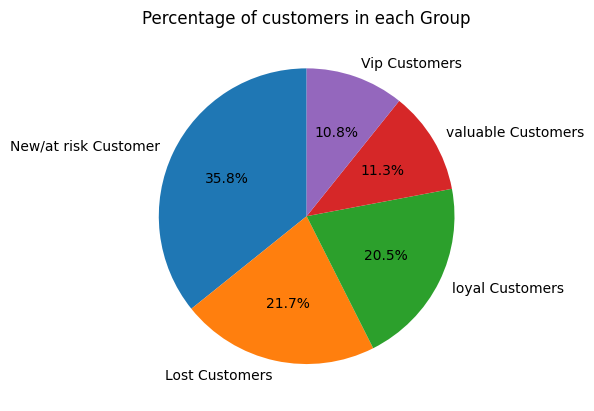

In [86]:
## No of Customerssss in each group 
noofcust=Finalcustomerdf['CustomerCategory'].value_counts()
plt.pie(noofcust,labels=noofcust.index,autopct='%1.1f%%',startangle=90)
plt.title('Percentage of customers in each Group')

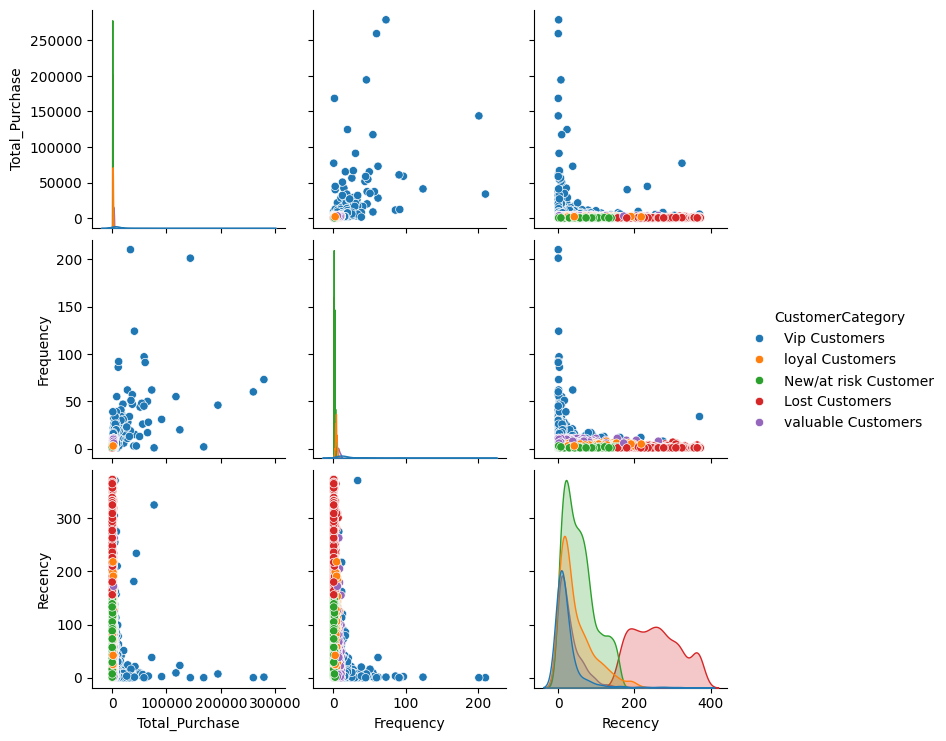

In [87]:
sns.pairplot(Finalcustomerdf, hue='CustomerCategory', vars=['Total_Purchase', 'Frequency', 'Recency'])
plt.show()


## Conclusion

## Top VIP Customers 👑
🟢 Very High Total Purchase  
🟢 Very High Frequency  
🟢 Recent Activity  
➡️ These customers are the top-tier revenue drivers — extremely loyal, frequent buyers, and high spenders.  
## 🔧 Retention Strategy:  
🎁 Offer ultra-exclusive VIP perks: private sales, early product drops, or concierge services.  
🛍️ Send personalized product bundles or curated recommendations.  
🏆 Recognize them publicly or with elite titles in loyalty programs ("Platinum", "Elite", etc.).   
📣 Create referral/influencer programs — these customers are your best advocates.  
🧠 Involve them in decision-making: surveys, beta features, or co-creation campaigns.  
Keeping these customers engaged is critical — they often represent a small % of users but a large % of revenue.

## Loyal Customers:  
🟡 Moderate Total Purchase  
🟡 Moderate Frequency  
🟢 Low Recency (recent activity)  
➡️ These are potential loyalists — they purchase decently and come often, and recently.  
Label: Potential Loyalists or Loyal Customers

## 🔧 Retention Strategy:
Send personalized product recommendations based on past purchases.  
Offer time-sensitive discounts to increase purchase frequency.  
Use email marketing to nurture them into top-tier customers.  
Promote a subscription or bundle option.



## Valuable Customers:  
🔵 Cluster 1 (Label: 1 — Blue)
🟢 High Total Purchase  
🟢 High Frequency  
🔴 Very Low Recency (they purchased recently)  
➡️ These are your most valuable customers — loyal and active.
customers

## 🔧 Retention Strategy:
Offer exclusive VIP rewards or early access to new products.  
Invite them to refer friends for bonuses.   
Ask for feedback or reviews — they’re most likely to advocate.  
Implement a tiered loyalty program to keep engagement high.  



## Lost Customer: 
🔴 Very Low Purchase  
🔴 Very Low Frequency  
🔴 Very High Recency (last purchase was long ago)  
➡️ These are churned or at-risk customers. They haven't engaged in a long time

## 🔧 Retention Strategy:
Send "We Miss You!" campaigns with a strong offer (e.g., 30% off).  
Offer a win-back incentive (free shipping, discount on next purchase).  
Use exit surveys to understand why they left.   
Target via retargeting ads if you have their behavior history.

## New/at risk Customer:
🔴 Low Total Purchase  
🔴 Low Frequency  
🟡 Slightly better Recency than Cluster 2  
➡️ These are newer or occasional customers. They might convert to loyal ones with marketing.

## 🔧 Retention Strategy:
Offer a first-purchase coupon to convert them.  
Guide them via welcome email flows.  
Use behavior-based nudges (e.g., “Still thinking about this product?”).  
Encourage account creation or wishlist building for more engagement.

